# 초기 데이터 생성 & 정제

## 데이터 단순 추출

In [13]:
import os
import pandas as pd
import glob
from time import sleep

def transform_u_to_t(seq):
    return seq.replace('U', 'T')

def get_base_list(rslt_lst, seq):
    n_pos = seq.find('N')
    
    if n_pos >= 0:  # N(Any)이 있는 경우
        for base in ['A', 'C', 'G', 'T']:  # 재귀적으로 추가
            get_base_list(rslt_lst, seq[:n_pos] + base + seq[n_pos+1:])
    else:  # N이 없는 경우 정보를 list에 저장
        rslt_lst.append(seq)

def merge_data():
    name = []
    seq = []
    bound = []
    base = ['A', 'C', 'G', 'T']

    datalist = glob.glob('./data/seq/*.seq')  # 경로 수정
    
    d = datalist[0].split('\\')[-1]
    bef_protein = "_".join(d.split('_')[:-4]) + '#' + "_".join(d.split('_')[-4:-1])
    
    print(bef_protein, 'progressing...')

    for i, d in enumerate(datalist):
        f = open(d, 'r')
        
        d = d.split('\\')[-1]  # 각 파일 제목만 추출
        protein = "_".join(d.split('_')[:-4]) + '#' + "_".join(d.split('_')[-4:-1])  # 명칭#추가정보

        if bef_protein != protein and i != 0:  # 저장파트, 앞선 단계와 비교 시 동일한 API끼리는 생략됨.
            # 결합 종류가 다양하므로 각 개별 처리 결과를 저장하는 방식으로 변경.
            bound_df = pd.DataFrame({'protein': name, 'seq': seq, 'bound': bound})
            bound_df.to_csv('./data/csv/' + bef_protein + '.csv', index=False)

            print(bef_protein, 'clear!')
            
            sleep(5)
            
            name = []
            seq = []
            bound = []
            
            print(protein, 'progressing...')

        f.readline()  # 맨 첫 줄은 제외
        
        for l in f.readlines():
            t = l.rstrip().split('\t')
            
            if t[-2].count('N') < 6:  # 너무 복제를 많이 하게 될 염기 서열은 배제(메모리 문제)
            # 가능한 염기 서열 정보 파악
                seq_one = transform_u_to_t(t[-2])
                seq_lst = []
                get_base_list(seq_lst, seq_one)

                for s in seq_lst:
                    name.append(protein)
                    seq.append(s)
                    bound.append(t[-1])
            else:
                print('\t=> Removed:', t[-2])
                
        f.close()
        
        bef_protein = protein
    
    bound_df = pd.DataFrame({'protein': name, 'seq': seq, 'bound': bound})
    bound_df.to_csv('./data/csv/' + bef_protein + '.csv', index=False)

    print(bef_protein, 'clear!')

    #bound_df = pd.DataFrame({'protein': name, 'seq': seq, 'bound': bound})
    #return bound_df

In [14]:
bound_df = merge_data()
print()
#print(bound_df.head())
#bound_df.to_csv('raw_data.csv', index=False)

Alx1_DBD#TAAAGC20NCG_3_Z progressing...
Alx1_DBD#TAAAGC20NCG_3_Z clear!
ALX3_DBD#TGTAAA20NAAG_2_Z progressing...
ALX3_DBD#TGTAAA20NAAG_2_Z clear!
ALX3_FL#TGCAAG20NGA_2_AE progressing...
ALX3_FL#TGCAAG20NGA_2_AE clear!
Alx4_DBD#TGGTAG20NCG_2_P progressing...
Alx4_DBD#TGGTAG20NCG_2_P clear!
ALX4_DBD#TGTGTC20NGA_2_W progressing...
ALX4_DBD#TGTGTC20NGA_2_W clear!
ARNTL_DBD#TCAAAA20NCG_3_W progressing...
ARNTL_DBD#TCAAAA20NCG_3_W clear!
Arx_DBD#TCGCAT20NACT_2_AC progressing...
Arx_DBD#TCGCAT20NACT_2_AC clear!
ARX_DBD#TGCGTT20NTGC_2_Z progressing...
ARX_DBD#TGCGTT20NTGC_2_Z clear!
Ar_DBD#TCTAAT20NCG_4_P progressing...
Ar_DBD#TCTAAT20NCG_4_P clear!
AR_DBD#TGCTCG20NGA_3_AF progressing...
AR_DBD#TGCTCG20NGA_3_AF clear!
AR_FL#TCTTCT20NCTG_4_AD progressing...
AR_FL#TCTTCT20NCTG_4_AD clear!
Ascl2_DBD#TAGGGC20NCG_4_Z progressing...
Ascl2_DBD#TAGGGC20NCG_4_Z clear!
Atf4_DBD#TGCCGC20NGA_4_Z progressing...
Atf4_DBD#TGCCGC20NGA_4_Z clear!
ATF4_DBD#TGGAAT20NGA_3_W progressing...
ATF4_DBD#TGGAAT20NGA_3_W

	=> Removed: ACGCCNCATCCAATTGGGGTTAAANANNNNAANNNNNNTA
	=> Removed: GCGTACCCGCCATTCCGAGCAGTGNANACGTTNNNTANAC
	=> Removed: CCTAAACATGGTACATCGAACACCNTNNNNGTNNNANNAG
	=> Removed: CCTTTTCCCACCCAATTCCTTAGCNANCGTTCNNNTCNGT
	=> Removed: TACGAACACTCAACAATTTAAGGNCNANNNNNNNNNNAAC
	=> Removed: TANATTTAACAAAGGNNNNCAACNNNNNNNACTCACGAAC
	=> Removed: AGCTCCGGTCTGACCTTATCACCCGNCNNNCNNNNCNTAA
	=> Removed: ACGAATAGNCNTCCNNNNNNCCNCCTGGTTACTCCGCTCA
	=> Removed: CTGCTCTCAGGGCGTTACCATTTAANCNTNTTNNNTNCAG
	=> Removed: CGCTNCNTATCACCAAGGTCANNTNTTTTNNCTTGGCTAG
	=> Removed: TGCGGTCCTACCCCACTAATTACNANANNNNNNNNTNACT
	=> Removed: TGGTACCACTTNNNTANATACCCTCGCCNNANNNNNAACT
	=> Removed: GCGACGACTTTAGAACTATTAAGGCNANGNTTNNNTNAAA
	=> Removed: GNAACGATNAACTAAGGACGCNNTTTTNNTTAAGANGCTA
	=> Removed: TACGATACCGATTGTATCGGGTCTANTNGNANNNNANTAA
	=> Removed: TCTTANTATAANGTATATNTGTCGACGANNACCGGGNNNA
	=> Removed: CCACAATTTTCAGCAATTAGCGCGCNANTNANNNNTNAGA
	=> Removed: CCACGAGCAGCGCANNNNTTCNAAANTNATTNATTTAGCA
	=> Removed: TAGGCGTGGAAGTCA

	=> Removed: ATCGAATACTGCACCTAATCGATCGNGTGNGNNNNGNTCA
	=> Removed: ACATCAATGNGCGTATGACTCTCCGNNNGATCGNNGNTAA
	=> Removed: ACCTAATCGATGCCTTATCGATAANCNTACATNNNGCNAN
	=> Removed: ANTNAATATCNGATACTGATATCCTTANCCGCAACGCNNN
	=> Removed: GTTGNGTGTACTGATGGCCNAANNNNNANAANNNNNANCN
	=> Removed: GTANNGTGGANNNNNACTGTGNCCNANNNAAATTGCNANN
	=> Removed: GAAGNACTCGATACAAAATNAANNNNNCNATNNGNNTNCN
	=> Removed: GNNNNTNNNCTCAAGAACGNANACNAAAATATNNGATNCN
	=> Removed: TAACGCTCAGGGCGACCCCTTAACNGNNNNNCNNNGAGCA
	=> Removed: TTAGAAGCTAACGCCNNGACCGGNCTCACNNNNNNGGCCA
	=> Removed: CGAGACAATCGAGTATCGAGCACCNANANNNTNNATGACA
	=> Removed: CNNACAGAACAGCGATNNNANTAGATCGANATGTCCACGA
	=> Removed: AGGAACAGATAGTATCGATGGGTTNGNATCGATNNNGNNN
	=> Removed: ATTAGGNGTCGGATCGAGATATNGNNNNNAATGACAGGTN
	=> Removed: CGATGTAATGATCGATAATNGATANAAANNNCNNGGAAGG
	=> Removed: CGANATAATCNNNNGAATATGATNCGAGTANGAAAATGGG
	=> Removed: GCACAGAAACCAATACTACNGATANANNNNNGNNNCGATC
	=> Removed: GAAGCTACNATANGATANNNNNNNGNCACACGATCAAACC
	=> Removed: AGCGGTACCGTCCGA

	=> Removed: GCTTATCGATAAAGATATCGATACNTNTNNNANNNATCCA
	=> Removed: GCGAAGATANNNATCTAACNTNNNATCGATNTCCATTATA
	=> Removed: GCATAATCGAACAAAAATCGATAANCNATAACANNNANNN
	=> Removed: GCNNNNCGAAATATCGAAAATANACAAATCANNACAATAN
	=> Removed: GACCCATGCAATCGCCATATCGATNANTNNNCNNGAAGCG
	=> Removed: GAATGACGCCGATCAGCATATCCCGCAANATNNCNNTNNG
	=> Removed: GATACACCGTCTGAGTCGCNCGTGNTNNNNNTNNNCATGC
	=> Removed: GCGNNNTGTGTNNCATAGACTGCCGATCGTCNNNNTNCAC
	=> Removed: ATATCGATAAACCCAAAAANAACANCNNNNNTNNNTAATG
	=> Removed: AATATAAACAAAACCNNNNTNAATGANNNTAANNCATCCG
	=> Removed: GGATCGATTAAGTAATCGANATCTNAACNNNGTNCTCGTC
	=> Removed: GTCGAGGAATCTNGTAATCNNCGANATTNNACTCGTAATC
	=> Removed: AGAGCCAATAACCAATCGANATCGNTNANNNANNCCTAAC
	=> Removed: ATNANNTCGATAAAANACTCCAATAGANCGNNNACCCAGC
	=> Removed: TGCCAAATAATAATCGATATATTTNTNGNNNANNCTCGCC
	=> Removed: TCTAATCGCAATTNNTATANAATAATGATTNNCGNNGCCC
	=> Removed: GCTTATCGATAAAATTATCNAGCTNTNNNNNTNNCGCCTA
	=> Removed: GCGATNTTTATATNNCTCGCTAGCTATNNNNNTCCNAAAA
	=> Removed: AATAGATGCTGTCCC

ELK1_FL#TGAGTG20NTGA_3_AG clear!
ELK3_DBD#TCGGGG20NGGT_2_AG progressing...
ELK3_DBD#TCGGGG20NGGT_2_AG clear!
Elk3_DBD#TGAGTG20NTGA_3_AC progressing...
Elk3_DBD#TGAGTG20NTGA_3_AC clear!
ELK4_DBD#TAGGGC40NGGT_3_AK progressing...
	=> Removed: GCCAGCTAACAAGGCATACTCCTCCTACTNNNNNAAANNC
	=> Removed: GCCTCACCTACTCATANNNNCCTACAGGCTNNNAAAAAGC
ELK4_DBD#TAGGGC40NGGT_3_AK clear!
EMX1_DBD#TCGCAT30NACT_3_AI progressing...
EMX1_DBD#TCGCAT30NACT_3_AI clear!
EMX2_DBD#TGGTTC30NTTT_4_AI progressing...
EMX2_DBD#TGGTTC30NTTT_4_AI clear!
EN1_DBD#TGTAGG20NGA_3_Y progressing...
EN1_DBD#TGTAGG20NGA_3_Y clear!
EN1_FL#TGACCT20NCCA_3_W progressing...
EN1_FL#TGACCT20NCCA_3_W clear!
EN1_FL#TGACCT20NCCA_4_W progressing...
EN1_FL#TGACCT20NCCA_4_W clear!
En2_DBD#TCAGCT20NCG_4_Z progressing...
En2_DBD#TCAGCT20NCG_4_Z clear!
EN2_DBD#TTGAGG20NGA_3_R progressing...
EN2_DBD#TTGAGG20NGA_3_R clear!
EN2_FL#TGCCAT20NGA_3_AE progressing...
EN2_FL#TGCCAT20NGA_3_AE clear!
EOMES_DBD#TGTAAA30NAAG_3_AI progressing...
EOMES_DBD#TGTAAA

	=> Removed: CTGCCCTCATGCCTGCTATCACACNANCCTAANTNNGNGN
	=> Removed: CTANTGNACTGCATGCCTCCCATACCTCAANNGNGCNCTN
	=> Removed: GGTGGTCTATATGGGCAGAAAAGANCNCCTGCNANAGNAN
	=> Removed: GGTGANANANAGGAGGGNCTAATCNCCAATAAGCTGTGCN
	=> Removed: CCAGCTAGACCACCCAACGAGTTGNTNGAGACNTNACNAN
	=> Removed: CNTANGTGAGAGAGCACCCGACCCTNAGNTTNACAACACN
	=> Removed: AGCGNCACAATGACAAGTGNAANNNNNCNTCNNNNNANGN
	=> Removed: ACNTGAAGCGNNNATGTCNNNCANNGNAAACAGNNNNCAN
	=> Removed: AGATGAGGAGATAAGTTGATGCGANANTGCCCNANNGNTN
	=> Removed: ATNANTGAGTGATTGGNGCCNNTGAGATAGCCGANAGAAN
	=> Removed: TAGCGTTGTTATGGGAGGTGCGAANGNNNNNGNNNAGGGG
	=> Removed: TGGTTATTGGCGTGNNGAAGGCGTANNGAGGGGNNNNNAG
	=> Removed: ATGCAAACTTAATTATACAGGGGGNANNNNNANNNGTTGG
	=> Removed: ANNNACATTTAAACAGNNNGGGCTTATANNNAATGGGGTG
	=> Removed: CAATTTACGCTACGCGTGGGCGACNANNNNNGNNNGAATA
	=> Removed: CGGTTANNNACTTAACGGCGCGNNGACAATATGCNNNNGA
	=> Removed: AGACCACCCAAGCAGGAATAGGAGNCNNNNNCNNNGCATT
	=> Removed: ACNNCAAGCNNNNNCCAGGCACCCAGGAGAGNNGAATTAT
	=> Removed: CATGGGCACGTGTCT

	=> Removed: GAGGTCAAAGTTCAAAAGATAGGCACCTANGNNNNGNTTA
	=> Removed: GNGTTACAAGANNNTAAGGGNNGTAAAGCAATTCCTCAGA
	=> Removed: GATACAAAGGTCGTTCATGAGCCATAGCGNGNNNNCNTGC
	=> Removed: GNNGCCAGCATGAGGTACGCGNNTTGAATCNNCAGTAATC
	=> Removed: GACTTTGAACCTTGAAGACGGTGCCCNNTANTNNNNCAGC
	=> Removed: GCCNTTGTTNNTAAAGACGACCTGCCACTTGGAGANNNNC
	=> Removed: ACNACGCGACAGTCACATATTTGGACNNTGNANNNNGGGA
	=> Removed: ANATGACACACGACNNNATGTTTCNNNGGCGGGNTAGACA
	=> Removed: CCGTCCTCACTCGTACAGTACATATTNNCCNTNNNNCCGG
	=> Removed: CTCATNCTACGGTCCGTTACNNNNTNNCACATAGTCCCCG
	=> Removed: AGCAGGGTCCAAAGTCCAAAGGAGCNAAGNANNNNANGTT
	=> Removed: ANAAGAAAGTCNAGCAGCAGGGTTCCCAANNNNGNAAGGT
	=> Removed: AACTGCCATGCCCCGCTAGGGGCAANGTCNACNNNANGCA
	=> Removed: AGCCATGCCGCNNGCCNNGGCACTCCTGGGTACAANANAA
	=> Removed: TAGGTTAAGCTTTCCAGAAAGGTCAANNTCCANNNNNTAN
	=> Removed: TANNNNTCAGGGTCCTCAGCCAAAANNNTAGAGTTTTAAN
	=> Removed: ACCCACACGATAGTCCAAAGTCCATNTCCNGNNNNGNTTT
	=> Removed: AGTNNTTCCNTCCCAAAGACACCCGNNNGNGTCACATATT
	=> Removed: GACTTTGGACCCTAA

Hoxa11_DBD#TCCCCT20NCG_4_Z clear!
HOXA13_DBD#TTCTCT20NTA_3_AF progressing...
HOXA13_DBD#TTCTCT20NTA_3_AF clear!
HOXA13_FL#TGTGGA20NGGG_4_AE progressing...
HOXA13_FL#TGTGGA20NGGG_4_AE clear!
HOXA1_DBD#TGGAAT20NAAT_3_AF progressing...
HOXA1_DBD#TGGAAT20NAAT_3_AF clear!
Hoxa2_DBD#TACCGT20NCG_3_Z progressing...
Hoxa2_DBD#TACCGT20NCG_3_Z clear!
HOXA2_DBD#TTATTA20NTA_3_AF progressing...
HOXA2_DBD#TTATTA20NTA_3_AF clear!
HOXB13_DBD#TGCCTG20NGA_3_Y progressing...
HOXB13_DBD#TGCCTG20NGA_3_Y clear!
HOXB2_DBD#TAACAA20NACA_2_Y progressing...
HOXB2_DBD#TAACAA20NACA_2_Y clear!
HOXB3_DBD#TACATT20NTAC_3_Y progressing...
HOXB3_DBD#TACATT20NTAC_3_Y clear!
HOXB5_DBD#TCTTGA20NGTG_3_Z progressing...
HOXB5_DBD#TCTTGA20NGTG_3_Z clear!
Hoxc10_DBD#TATAGA20NGAG_4_Z progressing...
Hoxc10_DBD#TATAGA20NGAG_4_Z clear!
HOXC10_DBD#TGGACA20NGA_3_Y progressing...
HOXC10_DBD#TGGACA20NGA_3_Y clear!
HOXC11_DBD#TCACTA20NTCA_4_AC progressing...
HOXC11_DBD#TCACTA20NTCA_4_AC clear!
HOXC11_FL#TGCGAA20NGA_4_AF progressing...
HO

IRX2_DBD#TGCATC30NTAC_4_AI clear!
Irx3_DBD#TACTGC20NCG_4_Z progressing...
Irx3_DBD#TACTGC20NCG_4_Z clear!
IRX5_DBD#TAAGGT20NTA_3_Q progressing...
IRX5_DBD#TAAGGT20NTA_3_Q clear!
ISL2_DBD#TCTAAT30NAAG_4_AI progressing...
ISL2_DBD#TCTAAT30NAAG_4_AI clear!
ISX_DBD#TATTTA20NCG_2_Y progressing...
ISX_DBD#TATTTA20NCG_2_Y clear!
ISX_DBD#TATTTA20NCG_3_Y progressing...
ISX_DBD#TATTTA20NCG_3_Y clear!
ISX_FL#TGAGTG20NTGA_2_AE progressing...
ISX_FL#TGAGTG20NTGA_2_AE clear!
Jdp2_DBD#TATCTG20NCG_3_Z progressing...
Jdp2_DBD#TATCTG20NCG_3_Z clear!
JDP2_DBD#TCCTTT20NTTC_4_AC progressing...
JDP2_DBD#TCCTTT20NTTC_4_AC clear!
JDP2_FL#TGTTCA20NGA_3_AE progressing...
JDP2_FL#TGTTCA20NGA_3_AE clear!
Klf12_DBD#TGATGG20NGA_4_Z progressing...
Klf12_DBD#TGATGG20NGA_4_Z clear!
KLF13_FL#TGGACA20NGA_4_AE progressing...
KLF13_FL#TGGACA20NGA_4_AE clear!
KLF14_DBD#TTGGGA20NTA_3_AF progressing...
KLF14_DBD#TTGGGA20NTA_3_AF clear!
KLF16_DBD#TTGATT20NTA_4_AF progressing...
KLF16_DBD#TTGATT20NTA_4_AF clear!
LBX2_DBD#TAATT

MGA_DBD#TAGGGC20NGGT_3_Y clear!
MIXL1_FL#TGATTT20NTTA_3_AE progressing...
MIXL1_FL#TGATTT20NTTA_3_AE clear!
MLXIPL_FL#TGTAAA20NAAG_3_AE progressing...
MLXIPL_FL#TGTAAA20NAAG_3_AE clear!
Mlx_DBD#CCTGG14N_3_T progressing...
Mlx_DBD#CCTGG14N_3_T clear!
MLX_FL#CATAT14N_4_S progressing...
MLX_FL#CATAT14N_4_S clear!
MNT_DBD#TCTTCT20NGA_3_Y progressing...
MNT_DBD#TCTTCT20NGA_3_Y clear!
MNX1_DBD#TGGTGA20NGTT_4_Z progressing...
MNX1_DBD#TGGTGA20NGTT_4_Z clear!
MSC_FL#TAGTCC20NCTT_4_AA progressing...
MSC_FL#TAGTCC20NCTT_4_AA clear!
MSX1_DBD#TGCGAA30NAGC_3_AI progressing...
	=> Removed: ATTAGCNCACACTAATTACNCCNTNNNCAG
MSX1_DBD#TGCGAA30NAGC_3_AI clear!
MSX1_FL#TGCTTA20NGA_3_AE progressing...
MSX1_FL#TGCTTA20NGA_3_AE clear!
MSX2_DBD#TGCGGG20NGA_3_W progressing...
MSX2_DBD#TGCGGG20NGA_3_W clear!
Msx3_DBD#TCGACT20NCAT_3_AA progressing...
Msx3_DBD#TCGACT20NCAT_3_AA clear!
MTF1_DBD#TGATCC20NCTA_4_Y progressing...
MTF1_DBD#TGATCC20NCTA_4_Y clear!
MYBL1_DBD#TTGCGT20NTA_4_AF progressing...
MYBL1_DBD#TTGCGT

	=> Removed: TTAAGGGACGAATTAAGAANTGGTNANNNNNANNNGAGAA
	=> Removed: TTATTNNANAGTACGANNNGAGGAAAAANNNNTGAAGGGA
	=> Removed: CAGAGGGACACCGTGCACGNTTTTNATGNNNTNNATGAAG
	=> Removed: CGACAACACGATNNNATGAGGNTGGNTTGTTTNNAGCCAG
	=> Removed: TGTGAGGAGGATAGGCCTGGAACANANGNNNTNNACAAAC
	=> Removed: TNNACTGGAGGACAAGNGANNNTGTGAGGGCATAANAACC
	=> Removed: CGAAATATCGAATATTCATNAAGGNTTGNNNAGNAAGTCA
	=> Removed: CGGNTCAATCAGNNNATTCGNAAATTGAGTAGATATNAAA
	=> Removed: AATGAGAGATAAGCTGAACNTCGANTNNNNNANNNATTCC
	=> Removed: ATNNNNTGAGACGCTGAAATAGAGANNNTTCNNANAATCC
	=> Removed: GCACCAAGGACCAATTAGCNTCTTNGAANNNGCNNTAACA
	=> Removed: GCNNTTTAAGCCTNNTCCANGCAAACNNGATAAGGACACA
	=> Removed: ACAGGTTATACCAATCGTGAATATNTNTNANGNNNAATCC
	=> Removed: ATNNAATAGACANTCGGTACCATNGNTNNATAAATGTTCC
	=> Removed: AGCATTCAGTGTCGCAATAAATTANANGNNNNNNNAGATG
	=> Removed: ATTAANNATCAGTGCAANNNNNATCAGTTAATGNNGAGCG
	=> Removed: CATTAATATGTTGATACGTATGTNNTNGNNNNNNNAAATG
	=> Removed: CATATGNNNNNNNTTNNAAAATGTTATATNGACGTATGTG
	=> Removed: AACTAATGAGCGAGG

Rfx2_DBD#TGGTAG20NATT_3_AC progressing...
Rfx2_DBD#TGGTAG20NATT_3_AC clear!
RFX3_DBD#TGGCTT20NGA_3_AC progressing...
RFX3_DBD#TGGCTT20NGA_3_AC clear!
Rfx3_DBD#TGGGTA20NCG_3_P progressing...
Rfx3_DBD#TGGGTA20NCG_3_P clear!
RFX4_DBD#TGACAG20NGA_3_O progressing...
RFX4_DBD#TGACAG20NGA_3_O clear!
RFX5_DBD#TGGAGC30NGAT_2_AI progressing...
RFX5_DBD#TGGAGC30NGAT_2_AI clear!
Rhox11_DBD#TGGCCC20NCG_4_P progressing...
Rhox11_DBD#TGGCCC20NCG_4_P clear!
RHOXF1_DBD#TGGATG30NTAT_3_AI progressing...
RHOXF1_DBD#TGGATG30NTAT_3_AI clear!
RHOXF1_DBD#TGGATG30NTAT_4_AI progressing...
RHOXF1_DBD#TGGATG30NTAT_4_AI clear!
RHOXF1_FL#TTAGAA20NTA_4_AE progressing...
RHOXF1_FL#TTAGAA20NTA_4_AE clear!
RORA_DBD#TCTGTA30NTGG_4_AI progressing...
RORA_DBD#TCTGTA30NTGG_4_AI clear!
RUNX2_DBD#TACCTA40NTCC_4_AI progressing...
	=> Removed: CTGTTCCGTGGAATAAACCCGCAGGNTNNNANNNNTNACA
	=> Removed: GGAGACGTAACATAGCGCTTACGNCNTNNNNNNNNCNCTG
	=> Removed: CCAACCACAGATCGATGAAATTTNGNANNNNNNNNNNCAC
	=> Removed: AATAGATGGACCCCTCAGCCGCCT

	=> Removed: TTACNAGGGGTTAAAGGTCAGNNNGNGNGG
	=> Removed: TTGCATGGATGTCGTGTGGNNNNNNGTTGA
	=> Removed: TCGGGTCAAAGGTCAACTGNNNNNNTTAAG
	=> Removed: TCTCGNNNNNNTCAAAACAGGGTTAAGGTG
RXRA_DBD#TCACGT30NGCA_3_AH clear!
RXRA_FL#TCTACA40NCAG_3_AI progressing...
	=> Removed: TCATGCGTATACTACCTTCGAGGGGTCATNANNNNANGCT
	=> Removed: CCAGACACATTGAACGAGAAAGCCATNNGGTTNNNNACCC
	=> Removed: AACTACTGCTAAGTCAGAATTGGGGNCAANGNNNNANGCC
	=> Removed: CCATCTTTATGCCTGGTTCAAAGGTNAAANCNNNNANCCA
	=> Removed: CTGCCACAGCCTACTTCCCGTTTACNCACNTNNNNCNCCT
	=> Removed: CTGCATGGGCCGCCAGTGCTTGTANCNTGACCNCNTTNCN
	=> Removed: AGAATATTTGCCATGAATGNTATANTNTGTCCGNNNANNN
	=> Removed: TACATTGCTGACTACATATCTAACNANNNNNGNNNACGCC
	=> Removed: AAGGGGCATTAAGTGCAGCTCAGGNTNANNNGNNATGGCC
	=> Removed: TCGTGCGGCTGACTCAACTNTTAGNGNNNNNCNNCTGAAA
	=> Removed: CAACCTGGTTTACTTTGCANTACCNCNNNNNGNNNGACAC
	=> Removed: CGGGCCTTACACCAGACACNACTANGNNNNNCNNNCAGTG
	=> Removed: CGGGAAACAGGTCATGACCCTAAGNGNGNNNANNNCGTGG
	=> Removed: GGCGGTCAGGGAGAGAAGAAGTCTNANTNANCNN

SPDEF_DBD#TCGCTG20NTCT_4_AD progressing...
SPDEF_DBD#TCGCTG20NTCT_4_AD clear!
SPDEF_FL#TCATTG20NCG_3_AD progressing...
SPDEF_FL#TCATTG20NCG_3_AD clear!
SPI1_FL#TCCCCT20NCG_3_AD progressing...
SPI1_FL#TCCCCT20NCG_3_AD clear!
SPIB_DBD#TGTCTA20NTCG_2_AK progressing...
SPIB_DBD#TGTCTA20NTCG_2_AK clear!
Spic_DBD#TATAGA20NCG_4_Z progressing...
Spic_DBD#TATAGA20NCG_4_Z clear!
SPIC_FL#TAGGCA20NCG_4_AD progressing...
SPIC_FL#TAGGCA20NCG_4_AD clear!
Srebf1_DBD#TACATT20NCG_3_Z progressing...
Srebf1_DBD#TACATT20NCG_3_Z clear!
SREBF2_DBD#TGAGAT20NGA_3_Y progressing...
SREBF2_DBD#TGAGAT20NGA_3_Y clear!
SRF_DBD#TGAACG20NGA_4_Y progressing...
SRF_DBD#TGAACG20NGA_4_Y clear!
SRF_FL#TGGAAT20NAAT_3_W progressing...
SRF_FL#TGGAAT20NAAT_3_W clear!
SRY_DBD#TACTGC30NGTC_3_AH progressing...
SRY_DBD#TACTGC30NGTC_3_AH clear!
SRY_DBD#TACTGC30NGTC_4_AH progressing...
SRY_DBD#TACTGC30NGTC_4_AH clear!
TBR1_DBD#TCACAC20NACA_3_Z progressing...
TBR1_DBD#TCACAC20NACA_3_Z clear!
TBR1_FL#TTGCAC20NACT_4_AE progressing...
T

	=> Removed: TACTAAGTAATATGCCCGCCCCTNCNCNNNNNNNNNNAAT
	=> Removed: TGCNNCCTNNNNNNNNNCTAATAGTATACCCCCGCNAAAT
	=> Removed: GATCAGATTAGTACGTATGTGAATANCNTNTCNNNTNTCA
	=> Removed: GATGATAGTCNNNTTNCATNTACGTAATANTGTCNTCAGA
	=> Removed: CTTCACACCTCAAGGTGAGAAGATTAGNANTANNNGNGTA
	=> Removed: CAAGACAGANTGTTAGGNNGATAGTAANGNNACTCTTCCA
	=> Removed: TGATCTAACGCCCCCCCCCCCAANCNCNNNCNNNNTNTGT
	=> Removed: TNNTAANCCCCCCNNNCCTGCCNCAACGATCCCCNNNTGT
	=> Removed: AAACATGCTGGCTTGACGGAAGGNCNANNNNNNNNCNTGC
	=> Removed: ATGGGAACTGCANNNTTGNNNCTGAAGGCNNAACNNNCGC
	=> Removed: CGTACACTTTTCACACCTCCACANANCNNNNNNNNANCTA
	=> Removed: CNNNCCACACACTTTCCGTANACTTCACANNCTANNNNNA
	=> Removed: AAATAACACCTTTATTCACACTTCAGTNTNAANNNGNTTA
	=> Removed: ACANTAATTACCAACTNNATNNTTTCAACTTAAGNGTTCA
	=> Removed: ACGTTGCGAGCATGGTTAACACCTACCNTNACNNNTNACC
	=> Removed: ACGCTNTACCCACACNTNNAAGTTACNNATTGTGGACGCC
	=> Removed: AACACCAGTTTTTNCACACCTACANGNGTGNANNNGTCCA
	=> Removed: ACANNNACCTTNGNGNCAACAGTGTTTTACCANGTCCACA
	=> Removed: AAATTCACACCACNA

	=> Removed: CAGATCACACGTACGATGTNAGAANANNNNNANNNAGACC
	=> Removed: AGTTAGGCCCCCTCGCGTGCAATTNANNNNNGNNNTCCAC
	=> Removed: AAGTCTAACCTTTTCACACNTATANGTANNNCCNAGCCCC
	=> Removed: AGGTGGACCGAAGCCACACNTCAGNGGTNNNAANAGCGGT
	=> Removed: AACCATAACAACGTCGTATNAAGCNCGTNNNAGNTCACAC
	=> Removed: AATANGTGCGCCACACCAGNAGCTNANACCCACNGNANNN
	=> Removed: AAGGNCTCATAACGAGGTGNCATTNANACCCCANNNGNNN
	=> Removed: GCAGACCCCTCGATAATGANGCAGNTNNNNNANNNCACCA
	=> Removed: CAGTTCACACCTCCTGGTNAGAAANTNANNNCNNNTCACC
	=> Removed: GATATTGAAAAGTTCACANTCATCNANGTNNGNNAAGCAC
	=> Removed: GCGAGAACGTGACGCCACNCCATCNTNANNNCNNNAAGGT
	=> Removed: GAGACAAGTACAGGTGTGAATTCANGNCNNNCNNTCCGCG
	=> Removed: AGAGTGAGAAGTCACACCTCTAGGNANCNNNANNCGCGAC
	=> Removed: CTACCACACCAAGAAGGTGTGATCCNANCATANNNNTCNC
	=> Removed: CNTATGTCCTGANCAGACCACNNNAATACCAAGGTCANNC
	=> Removed: ACCGAGACAAAGAAGGTGCGAAAGTNANACCTNCNNACNC
	=> Removed: AGAGAACCGACNAAGTGAAACNACCGTNCTNNCAANAGGC
	=> Removed: ACACGGTAGGCTCGAGGATTTAACACCTCNGNNNNTNTGA
	=> Removed: AGTACTCGCATTNTA

	=> Removed: TTAAGGCCCCTCGAAATTTAACCGNANCNNNCNNNTCCAG
	=> Removed: TAAAAGNCGGAANACNTTTTCNNNNNCGCCCCATCCCTAG
	=> Removed: ATCCGCCTCCAACATTACAACCACNCNGNNNNNNNAGTAC
	=> Removed: AAACGNACACCTATTAGTCNCACATCNNNNNNNGCCCACC
	=> Removed: AGGACCACCGCTCCATCACGGAGTNTNGNNNNNNNCTCAC
	=> Removed: ACTNGAGGGTNNNNNCCACGNNNTCAGATCCCTCACACGC
	=> Removed: CTCCCGTTTCCGATGTCATCTGTNNGNNNNNNNNNTCTCC
	=> Removed: CGTNNNNNGTCCTCTCCATTCGTGATTGNNNNNNTCCCTC
	=> Removed: TCATGCGACTACCACTTGTTCTTCNCNGNNNGNNGTGCAA
	=> Removed: TGNCNGTATGCTTGACGNNGTCACCNNNGCTTTCTCAACA
	=> Removed: TAGTCACGACACGCACCAGTAGGNNANANNNNNNNCAGTG
	=> Removed: TCANACACCAGGNNNNNCGTGACAGCACGTAGTANNNNAG
	=> Removed: CATGGACCGTGCTACTTGTGAAAGNGNCNNNANNNGCGCC
	=> Removed: CTGCCCNGNATTGTGNNNNNGANCGCTGGTAGAAACGCAC
	=> Removed: CTCCTCACCTTACAGTGTGAAATANCNCNNNNNNNATAAG
	=> Removed: CTTGTGTAACCTCCNAANNNNNNNCNCTATCAGAATACAG
	=> Removed: CACCATGGACAAACGACGCCAACANGNCNNNNNNNGACTG
	=> Removed: CACACGAACACCATGACAACGNCTGAANNNNNNGCCNNGG
TBX4_DBD#TACTTG40NTTC_3_AI c

	=> Removed: CTACGAGACGAAGAAATCACTGTGCNGCANANNNNANTCG
	=> Removed: CTGTGCAAGAGANNTAAACNANGCTCGACANNNACGATCG
	=> Removed: CAGACGATCTACAACCCTAACGCCTTNNAGTGNNNNNACN
	=> Removed: CTACGACCCNNNNNNAGACACGCCATCTGTAACTTNAAGN
	=> Removed: CATATCACGATATACTAGGGCGATNCNATTCCNGNTANTN
	=> Removed: CTNCNTACNGGATATAGCGGATCANATATATNTTCCACGN
	=> Removed: GAACGCATACCATGCATAGTTGTCGANANNNGNNTGCATA
	=> Removed: GNTATTGACGTATCCANGCATGTANNNNAATGCGAGCACA
	=> Removed: GGAATGTAAGGAATGCGAGACGTNNANNNNNGNNNTTTGC
	=> Removed: GAGNNGTAANNNNNTGAGCGGACGTGGAAATTNNNATTGC
	=> Removed: TCCCAGACGTCCCCCATTGNGAAGNTNNNNNCNNNGCACA
	=> Removed: TNGCCGNNGTGNNNNCCCCCCNNNTTCACAGACATCAGAA
	=> Removed: AGCCAAGTGGCAAACACCCNCACANGCCNNNCANTCCGTA
	=> Removed: ANNCCAAACAACACCCCCGGTGCAGTCNGCNNTANCAGCA
	=> Removed: GGTGTCGACTCACACATTCCTCGCNTNANNNNNNNCGACC
	=> Removed: GGTGACGCNNNNCGTNNACCATCTTCCGANNNTCTCACAC
	=> Removed: GAACTTTCTAAGTTCCCCCCCAAANANANNNCNNNTTGCC
	=> Removed: GANAGTTTCCTCAANTTACCCCNNNAAAANNNCCCCTTGC
	=> Removed: CCGCGAAACTGATGG

	=> Removed: ATGGCCCGACACANCTGACATATCNCNGAACTNNNTACCA
	=> Removed: CACTACCTGCCCCNACCTATTAACNCNCCGNANNNCACCA
	=> Removed: CGCGCGAACCCCANTAACTNGACANGCGGCTTNNNTTCCA
	=> Removed: CCGAANCATGATTCAATTAGTTGCNTNNNNATNNNNNNTC
	=> Removed: GCATGCCTGATTTATCAAGAAACANCNNGNATNNNTNNCA
	=> Removed: AAGCTTCGATATCCCTGCCCAACCNCNNCNTGNNNACNAC
	=> Removed: ATGAGGCGGACGGGCTTTGTATTCNTNTGNACNNNGNNCC
	=> Removed: CGTGGCTCGTCGCACTTACCCACANANNNNACNNNCNNCC
	=> Removed: CATCCACGANAGCTGGAAGCTACANCNNANGTNNNTNNCC
	=> Removed: TATCCTATGGAACCGTTGTACACTTNANCNACNNNCNCCA
	=> Removed: TCACCNNCAATACNCCTGACGTATTGGTNNCTTANACCNA
	=> Removed: TTCAGTGAAAGTTGAAACATAAAGACANTNATNNNTNTGG
	=> Removed: TNACANNTTGGTTNNTCAAAAGAAGTAATGAGACAATNTG
	=> Removed: TGGTTGCCGTTTCTAATTGCACCNGNGNNNNNNNNGNCTA
	=> Removed: TGNNNNGTTACCCTCGTTGGNCTAATTTGCNNNNGNNGCA
	=> Removed: CACCCAACTTAGCATCAATACAGNANANTNCNNNNTNCTT
	=> Removed: CCACCATAGNACATTTAANNTNAANTCACAGCTNNNCNCT
	=> Removed: TCCTCTCACGTACTAATGTCCACNCNGNNNCNNNNCNCCT
	=> Removed: TCATACNCNCTCGTA

## 데이터 정제

In [1]:
from itertools import product

def kmer(seq, k):
    base = ['A', 'C', 'G', 'T']
    
    keys = list(map(''.join, product(base, repeat=k)))
    dicts = {}
    for key in keys: dicts[key] = 0
    
    for i in range(len(seq)-k+1):
        now = seq[i:i+k]
        dicts[now] += 1
    
    for key in keys: dicts[key] /= (len(seq)-k+1)
    return dicts

In [16]:
import os
import glob
from time import sleep
import pandas as pd

datalist = glob.glob('./data/csv/*.csv')

for z, data in enumerate(datalist):
    file_name = data.split('\\')[-1].split('.')[0]
    protein_name = file_name.split('#')[0]
    
    print('progressing... ' + protein_name, end=' > ')
    bound_df = pd.read_csv(data)
    
    meta_list = [[], [], [], []]
    no = 0
    
    for i in bound_df.index:
        val = bound_df.loc[i, 'seq']
        for j in range(1, 5):
            meta_list[j-1].append(kmer(val, j))
            
        if ((i+1)%250000 == 0) or ((i+1) == len(bound_df)):
    
            for k in range(len(meta_list)):
                meta_list[k] = pd.DataFrame(meta_list[k])
                
            # 기존 Dataframe 정보랑 병합 및 메타정보 저장
            bdorigin = bound_df.iloc[250000*no : min(250000*(no+1), len(bound_df))].reset_index().drop(['index'], axis=1)
            concats = pd.concat([bdorigin, pd.concat(meta_list, axis=1)], axis=1)
            concats.to_csv('./data/metacsv/metadata#' + file_name + '_' + str(no).zfill(2) + '.csv', index=False)
            
            print('[now line ' + str(i) + ']', end=' > ')
            
            no += 1 
            bdorigin = ""
            concats = ""
            meta_list = [[], [], [], []]
            
            break

    print('done!')

progressing... FOXD2_DBD > [now line 114864] > done!
progressing... FOXD3_DBD > [now line 55603] > done!
progressing... Foxg1_DBD > [now line 35417] > done!
progressing... FOXG1_DBD > [now line 249999] > done!
progressing... FOXI1_FL > [now line 115561] > done!
progressing... FOXJ2_DBD > [now line 183321] > done!
progressing... FOXJ2_DBD > [now line 249999] > done!
progressing... Foxj3_DBD > [now line 249999] > done!
progressing... Foxj3_DBD > [now line 206926] > done!
progressing... FOXJ3_DBD > [now line 119151] > done!
progressing... FOXK1_DBD > [now line 36613] > done!
progressing... Foxk1_DBD > [now line 249999] > done!
progressing... FOXL1_FL > [now line 178140] > done!
progressing... FOXO1_DBD > [now line 249999] > done!
progressing... FOXO3_FL > [now line 34219] > done!
progressing... FOXO4_DBD > [now line 242788] > done!
progressing... FOXO6_DBD > [now line 249999] > done!
progressing... FOXO6_DBD > [now line 249999] > done!
progressing... FOXP3_DBD > [now line 82247] > done!
p

progressing... MNT_DBD > [now line 71034] > done!
progressing... MNX1_DBD > [now line 10077] > done!
progressing... MSC_FL > [now line 249999] > done!
progressing... MSX1_DBD > [now line 249999] > done!
progressing... MSX1_FL > [now line 249999] > done!
progressing... MSX2_DBD > [now line 226986] > done!
progressing... Msx3_DBD > [now line 194280] > done!
progressing... MTF1_DBD > [now line 80521] > done!
progressing... MYBL1_DBD > [now line 129368] > done!
progressing... MYBL2_DBD > [now line 249999] > done!
progressing... MYF6_FL > [now line 79369] > done!
progressing... NEUROD2_FL > [now line 127329] > done!
progressing... NEUROG2_DBD > [now line 100509] > done!
progressing... NEUROG2_FL > [now line 74052] > done!
progressing... NFAT5_DBD > [now line 249999] > done!
progressing... NFATC1_FL > [now line 137513] > done!
progressing... NFE2_DBD > [now line 56636] > done!
progressing... NFIA_FL > [now line 249999] > done!
progressing... NFIB_FL > [now line 249999] > done!
progressing...

## 단백질 정보 결합

In [2]:
import pandas as pd

meta_data = pd.read_csv('./data/meta_data.csv')

print(meta_data.head())
print()
print(meta_data.shape)

    protein                   seq  bound     A     C     G     T        AA  \
0  Alx1_DBD  GCAGATAATCTAATTACCCC      1  0.35  0.30  0.10  0.25  0.105263   
1  Alx1_DBD  CTCAGTCCTCGTCTCGATGG      1  0.10  0.35  0.25  0.30  0.000000   
2  Alx1_DBD  TCATAATCTAATTACGCTCG      1  0.30  0.25  0.10  0.35  0.105263   
3  Alx1_DBD  GACTTCCTCAATCTAATTAG      1  0.30  0.25  0.10  0.35  0.105263   
4  Alx1_DBD  GCAGTTAATCTAATTAACCG      1  0.35  0.20  0.15  0.30  0.157895   

         AC        AG  ...  TTCG  TTCT  TTGA  TTGC  TTGG  TTGT  TTTA  TTTC  \
0  0.052632  0.052632  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.000000  0.052632  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.052632  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.052632  0.052632  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.052632  0.052632  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   TTTG  TTTT  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0 

In [20]:
protein_key = {
    'Alx1': 'Alx1_DBD',
    'ALX3': 'ALX3_FL',
    'ARX': 'AR_DBD',
    'AR_FL': 'AR_FL'
}

protein_data = pd.read_csv('./data/protein_data.csv', index_col=0).rename(index=protein_key)

print(protein_data)

              Xc1.A      Xc1.R     Xc1.N      Xc1.D     Xc1.C      Xc1.E  \
Alx1_DBD   5.777514   5.777514  4.727057   3.676600  1.575686   5.777514   
AR_DBD    29.795622   9.746231  1.113855   6.683130  1.949246  13.923188   
ALX3_FL    7.778015   5.555725  2.222290   3.333435  1.666717   5.277939   
AR_FL     22.952068  11.617713  5.667177  10.484278  7.650689  15.584737   

              Xc1.Q      Xc1.G     Xc1.H     Xc1.I  ...  Xc2.lambda.21  \
Alx1_DBD   3.939214   4.464442  3.151371  1.575686  ...       0.024928   
AR_DBD     4.455420  12.809333  2.784638  1.949246  ...       0.024520   
ALX3_FL    3.333435   9.444732  3.333435  1.388931  ...       0.025110   
AR_FL     20.118479  27.202451  5.383818  6.517254  ...       0.023726   

          Xc2.lambda.22  Xc2.lambda.23  Xc2.lambda.24  Xc2.lambda.25  \
Alx1_DBD       0.024796       0.025620       0.023088       0.025465   
AR_DBD         0.024911       0.024567       0.024679       0.025296   
ALX3_FL        0.023479       0.

In [23]:
df_joined = pd.merge(meta_data, protein_data, left_on='protein', right_index=True)
print(df_joined.head())

    protein                   seq  bound     A     C     G     T        AA  \
0  Alx1_DBD  GCAGATAATCTAATTACCCC      1  0.35  0.30  0.10  0.25  0.105263   
1  Alx1_DBD  CTCAGTCCTCGTCTCGATGG      1  0.10  0.35  0.25  0.30  0.000000   
2  Alx1_DBD  TCATAATCTAATTACGCTCG      1  0.30  0.25  0.10  0.35  0.105263   
3  Alx1_DBD  GACTTCCTCAATCTAATTAG      1  0.30  0.25  0.10  0.35  0.105263   
4  Alx1_DBD  GCAGTTAATCTAATTAACCG      1  0.35  0.20  0.15  0.30  0.157895   

         AC        AG  ...  Xc2.lambda.21  Xc2.lambda.22  Xc2.lambda.23  \
0  0.052632  0.052632  ...       0.024928       0.024796        0.02562   
1  0.000000  0.052632  ...       0.024928       0.024796        0.02562   
2  0.052632  0.000000  ...       0.024928       0.024796        0.02562   
3  0.052632  0.052632  ...       0.024928       0.024796        0.02562   
4  0.052632  0.052632  ...       0.024928       0.024796        0.02562   

   Xc2.lambda.24  Xc2.lambda.25  Xc2.lambda.26  Xc2.lambda.27  Xc2.lambda.28  \


In [27]:
# 실제 데이터 저장
df_joined.to_csv('./data/full_meta_data.csv', index=False)

# 샘플용
# df_joined.iloc[[int(i*113245) for i in range(10)]].to_csv('./data/full_meta_data_sample.csv', index=False)

# EDA

In [6]:
import pandas as pd

meta_data = pd.read_csv('./data/full_meta_data.csv')

print(meta_data.head())
print()
print(meta_data.shape)

    protein                   seq  bound     A     C     G     T        AA  \
0  Alx1_DBD  GCAGATAATCTAATTACCCC      1  0.35  0.30  0.10  0.25  0.105263   
1  Alx1_DBD  CTCAGTCCTCGTCTCGATGG      1  0.10  0.35  0.25  0.30  0.000000   
2  Alx1_DBD  TCATAATCTAATTACGCTCG      1  0.30  0.25  0.10  0.35  0.105263   
3  Alx1_DBD  GACTTCCTCAATCTAATTAG      1  0.30  0.25  0.10  0.35  0.105263   
4  Alx1_DBD  GCAGTTAATCTAATTAACCG      1  0.35  0.20  0.15  0.30  0.157895   

         AC        AG  ...  Xc2.lambda.21  Xc2.lambda.22  Xc2.lambda.23  \
0  0.052632  0.052632  ...       0.024928       0.024796        0.02562   
1  0.000000  0.052632  ...       0.024928       0.024796        0.02562   
2  0.052632  0.000000  ...       0.024928       0.024796        0.02562   
3  0.052632  0.052632  ...       0.024928       0.024796        0.02562   
4  0.052632  0.052632  ...       0.024928       0.024796        0.02562   

   Xc2.lambda.24  Xc2.lambda.25  Xc2.lambda.26  Xc2.lambda.27  Xc2.lambda.28  \


## bound 및 단백질 종류에 따른 데이터 비율

In [7]:
L = len(meta_data)
meta_data.value_counts(['bound']) / L * 100

# 1/3이 unbound, 2/3이 bound와 관련된 데이터

bound
1        66.667432
0        33.332568
dtype: float64

In [12]:
meta_data.value_counts(['protein']) / L * 100

# Alx1, ALX3, AR_DBD는 각각 30% 정도의 비율. but AR_FL은 5%도 채 안 되는 데이터 양.

protein 
Alx1_DBD    33.890823
ALX3_FL     31.299555
AR_DBD      30.546502
AR_FL        4.263120
dtype: float64

In [13]:
meta_data.value_counts(['bound', 'protein']) / L * 100

# bound와 protein을 기준으로 나눴을 때 데이터의 비율.
# 각 단백질마다 1/3은 0, 2/3은 1의 bound임을 알 수 있음.

bound  protein 
1      Alx1_DBD    22.600417
       ALX3_FL     20.860925
       AR_DBD      20.364394
0      Alx1_DBD    11.290407
       ALX3_FL     10.438630
       AR_DBD      10.182108
1      AR_FL        2.841697
0      AR_FL        1.421423
dtype: float64

## k-mer 지표에 따른 분포

길이 1 인 경우의 k-mer 지표별 비율 (0% 고려)


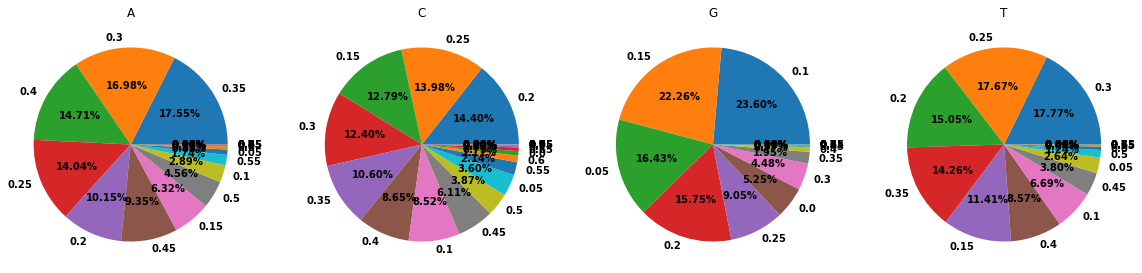

길이 2 인 경우의 k-mer 지표별 비율 (0% 고려)


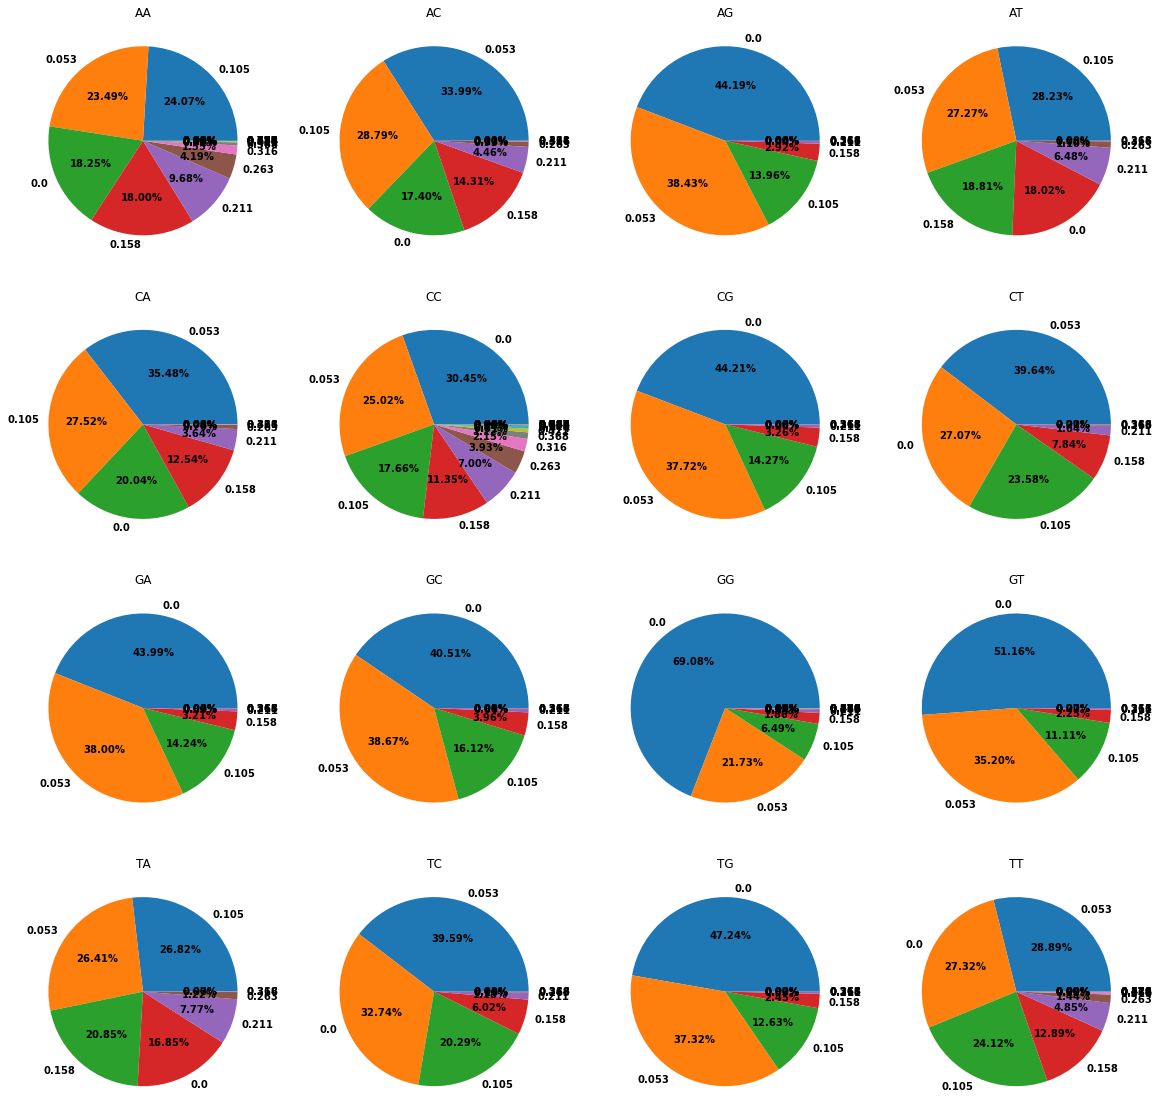

길이 3 인 경우의 k-mer 지표별 비율 (0% 고려)


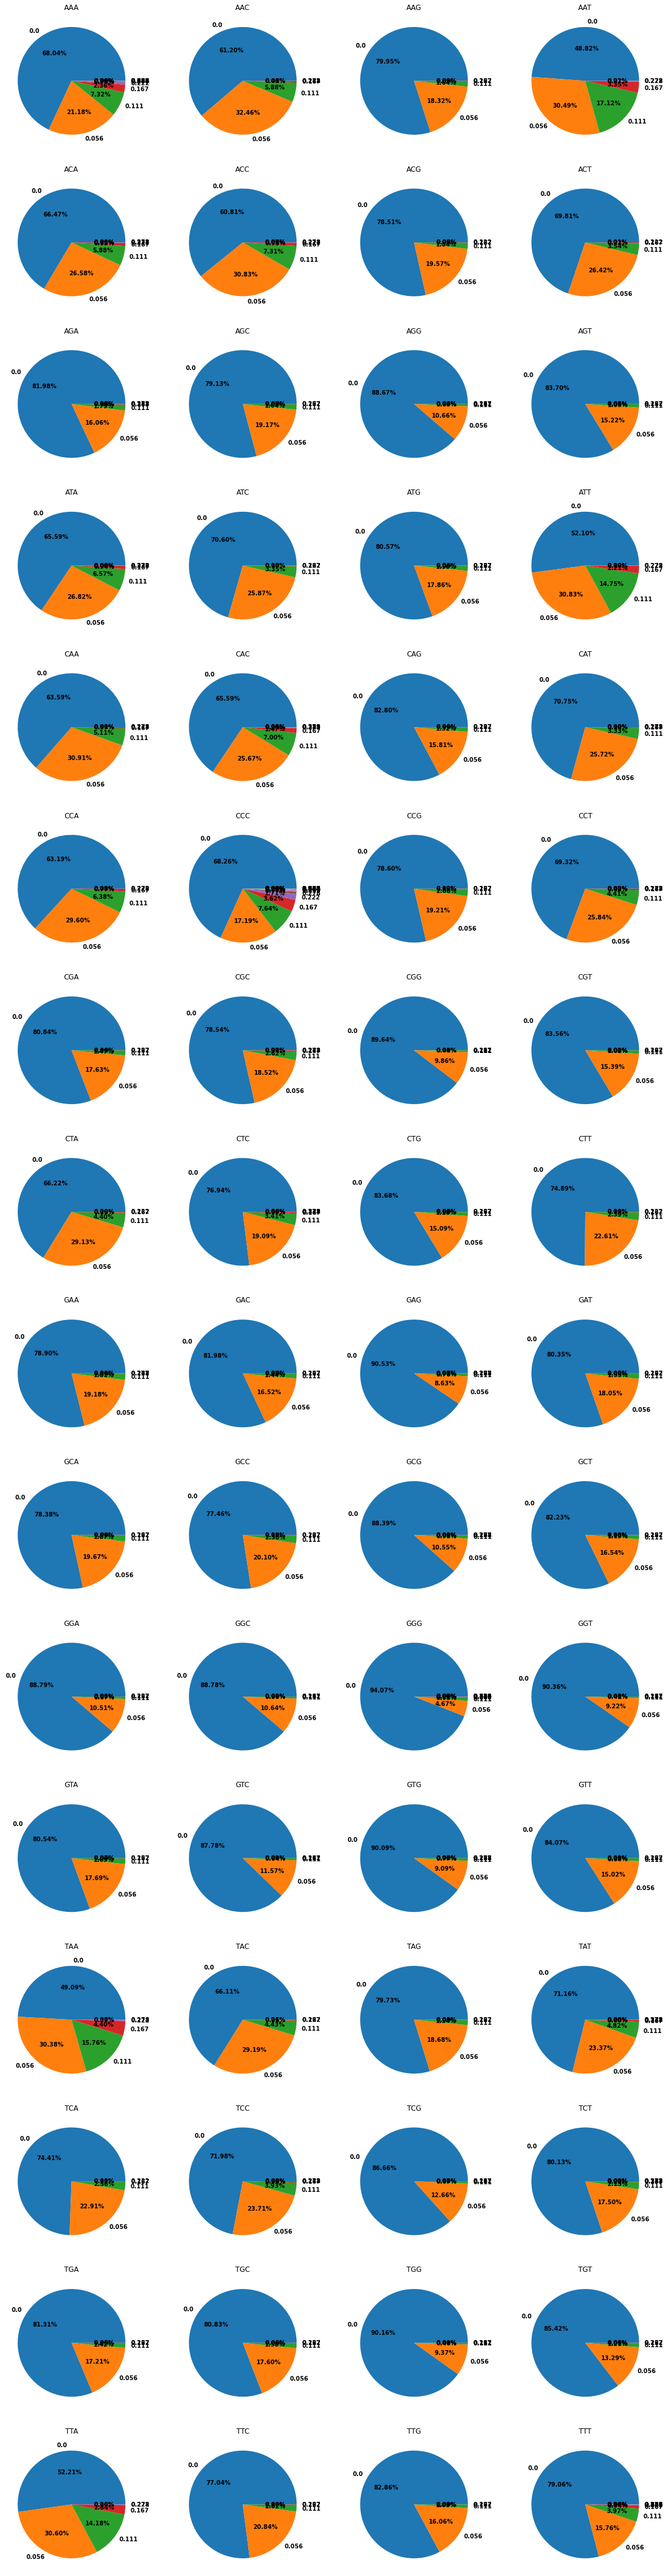

길이 4 인 경우의 k-mer 지표별 비율 (0% 고려)


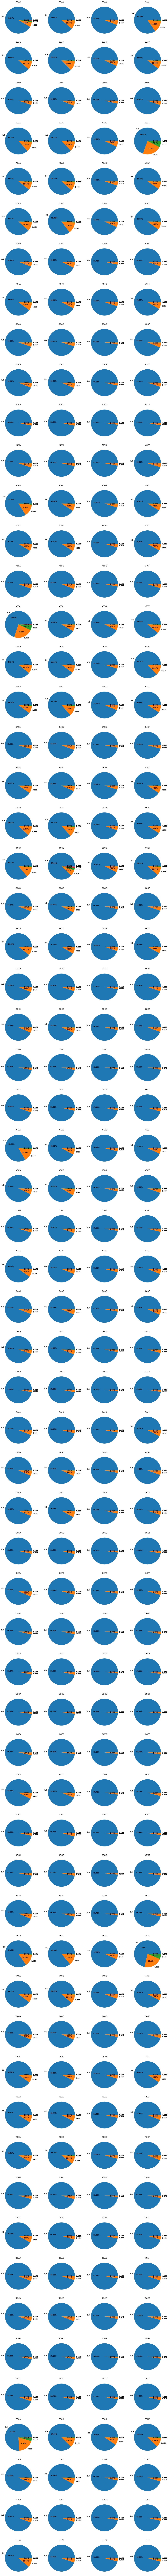

In [10]:
import matplotlib.pyplot as plt
from itertools import product

L = len(meta_data)

for i in range(1, 5):
    print('길이', i, '인 경우의 k-mer 지표별 비율 (0% 고려)')
    
    prd = list(product(['A', 'C', 'G', 'T'], repeat=i))

    col_names = []
    for p in prd:
        col_name = "".join(p)
        col_names.append(col_name)
    
    kmer_data = meta_data[col_names]
    
    plt.figure(figsize=(20, 5*len(col_names)//4))
    
    for j, col in enumerate(col_names):
        j += 1
        plt.subplot(len(col_names)//4, 4, j)
        
        cnt = kmer_data[col].value_counts()
        
        newidx = []
        for ci in cnt.index:
            newidx.append(round(ci, 3))

        plt.pie(cnt, labels=newidx, autopct='%.2f%%', textprops={'fontweight':'bold'})
        plt.title(col)
        
    plt.savefig('./figure/o_k_mer_len' + str(i) + '.png')
    plt.show()
    
    print('========================================================================================')

길이 1 인 경우의 k-mer 지표별 비율 (0% 제외)


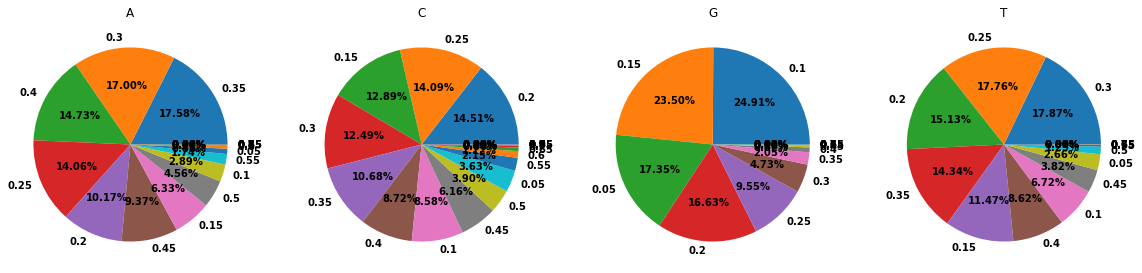

길이 2 인 경우의 k-mer 지표별 비율 (0% 제외)


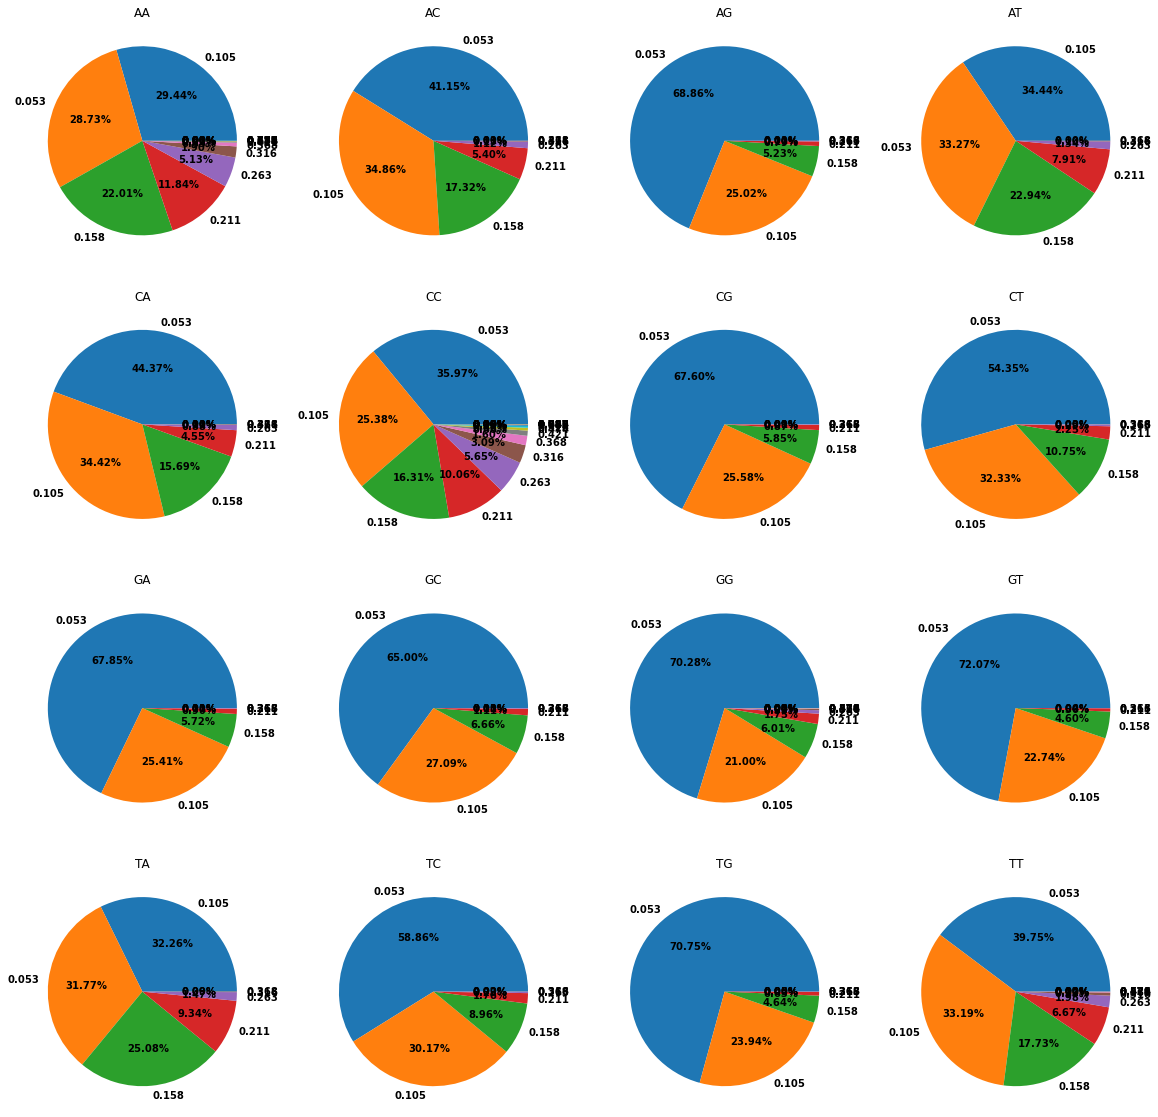

길이 3 인 경우의 k-mer 지표별 비율 (0% 제외)


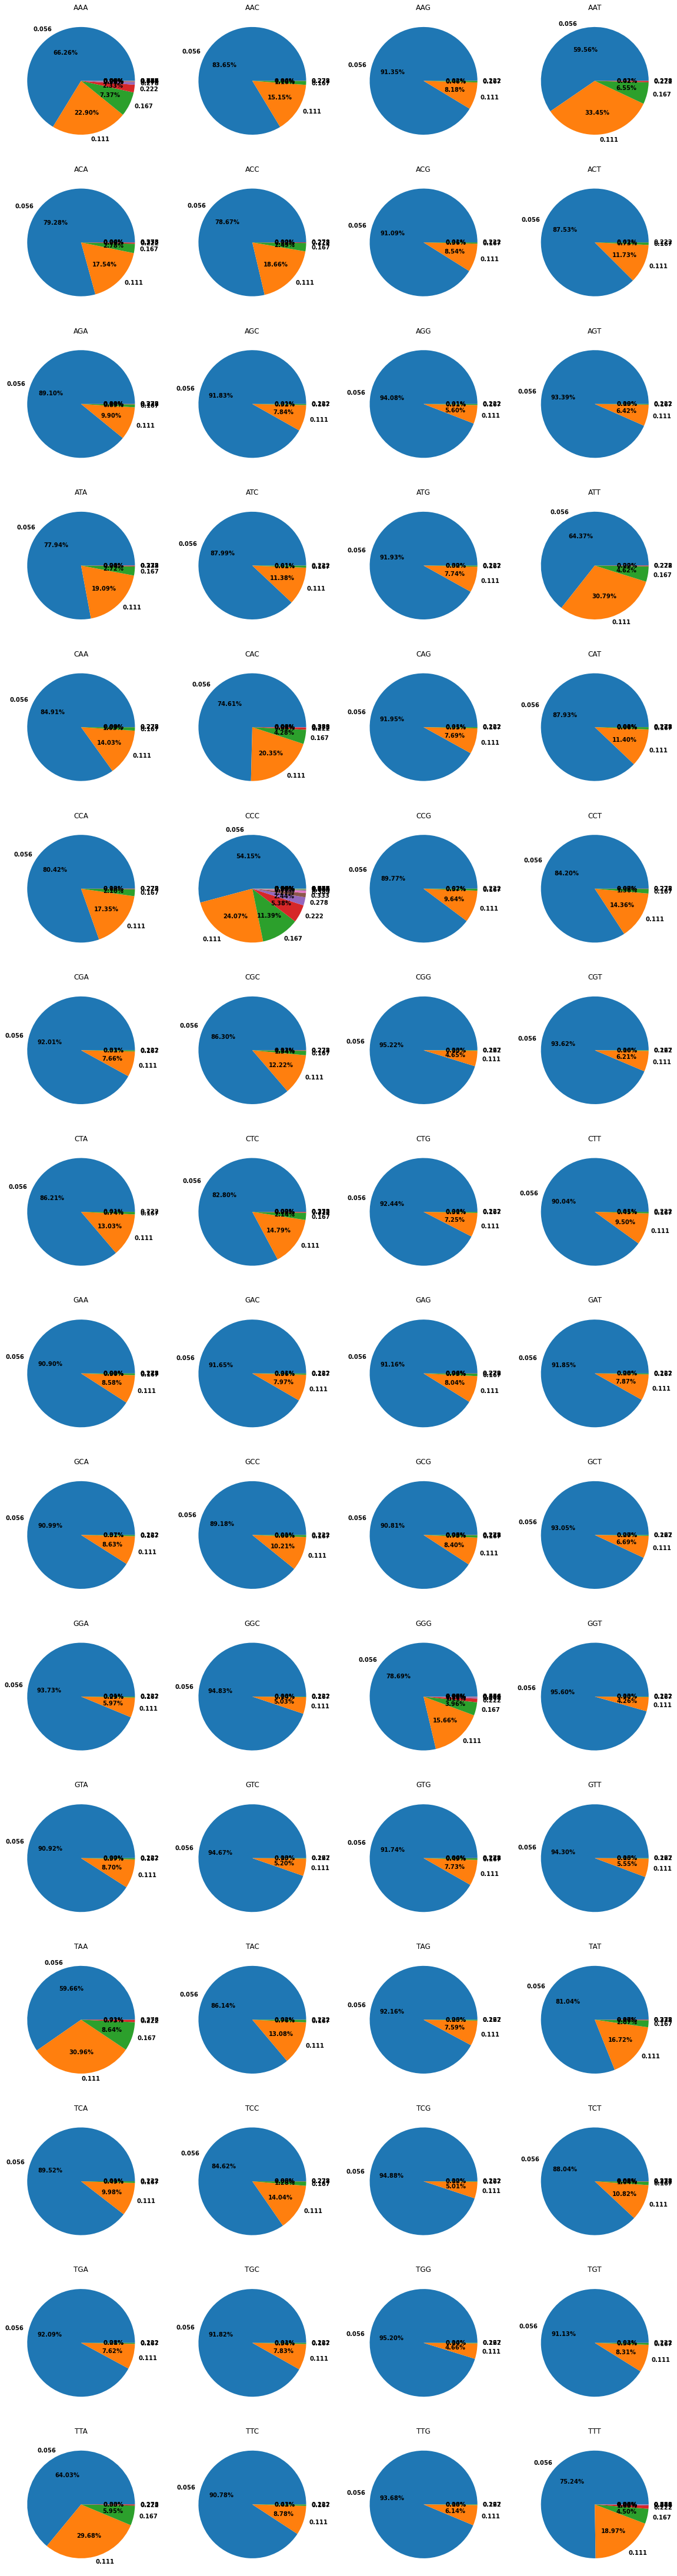

길이 4 인 경우의 k-mer 지표별 비율 (0% 제외)


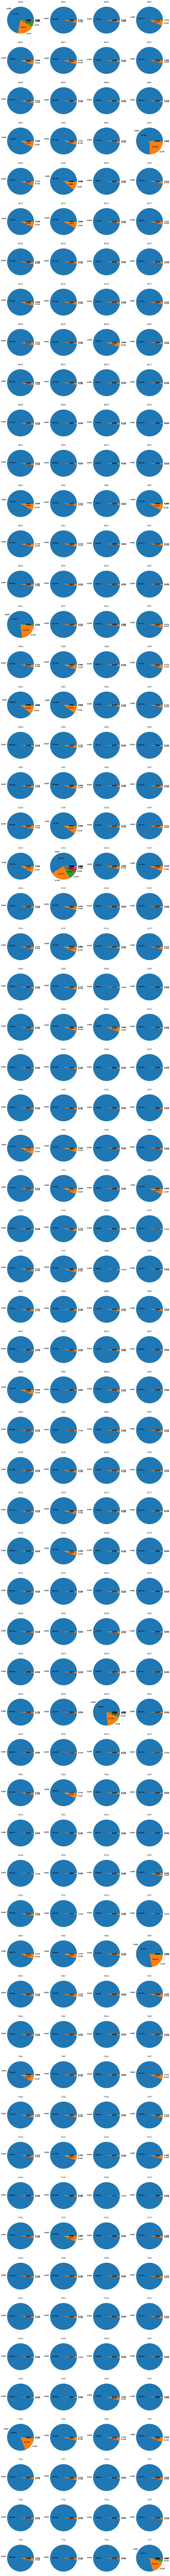

In [11]:
import matplotlib.pyplot as plt
from itertools import product

L = len(meta_data)

for i in range(1, 5):
    print('길이', i, '인 경우의 k-mer 지표별 비율 (0% 제외)')
    
    prd = list(product(['A', 'C', 'G', 'T'], repeat=i))

    col_names = []
    for p in prd:
        col_name = "".join(p)
        col_names.append(col_name)
    
    kmer_data = meta_data[col_names]
    
    plt.figure(figsize=(20, 5*len(col_names)//4))
    
    for j, col in enumerate(col_names):
        j += 1
        plt.subplot(len(col_names)//4, 4, j)
        
        cnt = kmer_data[col].value_counts().drop([0.0])
        
        newidx = []
        for ci in cnt.index:
            newidx.append(round(ci, 3))

        plt.pie(cnt, labels=newidx, autopct='%.2f%%', textprops={'fontweight':'bold'})
        plt.title(col)
        
    plt.savefig('./figure/x_k_mer_len' + str(i) + '.png')
    plt.show()
    
    print('========================================================================================')